In [ ]:
import pandas as pd

# Load dataset (assuming it's in CSV format)
df = pd.read_csv("Palm+7-day+149auctions+Curve+Clustering+Data.csv")

# Display the first few rows
print(df.head())


    auctionid   bid  bidtime        bidder  bidderrate  openbid  price
0  2920322392  50.0  1.43791       fxman27          23     0.01  260.0
1  2920322392   1.0  1.77995  thebeemanone         186     0.01  260.0
2  2920322392   2.0  1.94888    scalpal007           0     0.01  260.0
3  2920322392   5.0  1.94964    scalpal007           0     0.01  260.0
4  2920322392  10.0  1.94990    scalpal007           0     0.01  260.0


In [5]:
import os
!pip install pandas



In [6]:
import pandas as pd

# Load dataset (assuming it's in CSV format)
df = pd.read_csv("Palm+5-day+auctions.csv")

# Display the first few rows
print(df.head())

    auctionid   bid  bidtime        bidder  bidderrate  openbid  price
0  2920322392  50.0  1.43791       fxman27          23     0.01  260.0
1  2920322392   1.0  1.77995  thebeemanone         186     0.01  260.0
2  2920322392   2.0  1.94888    scalpal007           0     0.01  260.0
3  2920322392   5.0  1.94964    scalpal007           0     0.01  260.0
4  2920322392  10.0  1.94990    scalpal007           0     0.01  260.0


In [7]:
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("Palm+5-day+auctions.csv")

# Step 2: Display first few rows to confirm
print("Sample data:\n", df.head())

# Step 3: Check for missing values (especially in 'bidder' column)
print("\nMissing values in each column:\n", df.isnull().sum())

# Step 4: Remove rows with missing 'bidder' IDs (incomplete data)
df_cleaned = df.dropna(subset=['bidder'])

print("\nData shape after removing missing 'bidder' IDs:", df_cleaned.shape)

# Step 5: Count number of bids per auction
bid_counts = df_cleaned.groupby('auctionid').size().reset_index(name='BidCount')

print("\nAuction bid counts:\n", bid_counts.head())

# Step 6: Keep only auctions with 3 or more bids
valid_auctions = bid_counts[bid_counts['BidCount'] >= 3]['auctionid']
df_cleaned = df_cleaned[df_cleaned['auctionid'].isin(valid_auctions)]

print("\nData shape after removing auctions with less than 3 bids:", df_cleaned.shape)

# Step 7: Final verification
print("\nTotal unique auctions before cleaning:", df['auctionid'].nunique())
print("Total unique auctions after cleaning:", df_cleaned['auctionid'].nunique())
print("Total rows after cleaning:", len(df_cleaned))

# Step 8: Save the cleaned data
df_cleaned.to_csv("Palm_Auctions_Cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved successfully as 'Palm_Auctions_Cleaned.csv'!")


Sample data:
     auctionid   bid  bidtime        bidder  bidderrate  openbid  price
0  2920322392  50.0  1.43791       fxman27          23     0.01  260.0
1  2920322392   1.0  1.77995  thebeemanone         186     0.01  260.0
2  2920322392   2.0  1.94888    scalpal007           0     0.01  260.0
3  2920322392   5.0  1.94964    scalpal007           0     0.01  260.0
4  2920322392  10.0  1.94990    scalpal007           0     0.01  260.0

Missing values in each column:
 auctionid     0
bid           0
bidtime       0
bidder        0
bidderrate    0
openbid       0
price         0
dtype: int64

Data shape after removing missing 'bidder' IDs: (869, 7)

Auction bid counts:
     auctionid  BidCount
0  2920322392        32
1  3013951754        18
2  3014012075         4
3  3014085073        14
4  3014314236         5

Data shape after removing auctions with less than 3 bids: (860, 7)

Total unique auctions before cleaning: 54
Total unique auctions after cleaning: 47
Total rows after cleaning:

In [8]:
import pandas as pd

# Load the cleaned CSV file
cleaned_df = pd.read_csv("Palm_Auctions_Cleaned.csv")

# Display first 5 rows to confirm
print(cleaned_df.head())


    auctionid   bid  bidtime        bidder  bidderrate  openbid  price
0  2920322392  50.0  1.43791       fxman27          23     0.01  260.0
1  2920322392   1.0  1.77995  thebeemanone         186     0.01  260.0
2  2920322392   2.0  1.94888    scalpal007           0     0.01  260.0
3  2920322392   5.0  1.94964    scalpal007           0     0.01  260.0
4  2920322392  10.0  1.94990    scalpal007           0     0.01  260.0


In [9]:
import pandas as pd

# Load your cleaned PDA dataset
df = pd.read_csv("Palm_Auctions_Cleaned.csv")  # Replace this filename with your actual cleaned dataset

# Preview the dataset
print("Dataset Preview:\n", df.head())
print("\nDataset Info:\n")
print(df.info())


Dataset Preview:
     auctionid   bid  bidtime        bidder  bidderrate  openbid  price
0  2920322392  50.0  1.43791       fxman27          23     0.01  260.0
1  2920322392   1.0  1.77995  thebeemanone         186     0.01  260.0
2  2920322392   2.0  1.94888    scalpal007           0     0.01  260.0
3  2920322392   5.0  1.94964    scalpal007           0     0.01  260.0
4  2920322392  10.0  1.94990    scalpal007           0     0.01  260.0

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   auctionid   860 non-null    int64  
 1   bid         860 non-null    float64
 2   bidtime     860 non-null    float64
 3   bidder      860 non-null    object 
 4   bidderrate  860 non-null    int64  
 5   openbid     860 non-null    float64
 6   price       860 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 47.2+ KB
None

In [10]:
# Fix the total participation count
total_participation = df['bidder'].value_counts().reset_index()
total_participation.columns = ['bidder', 'total_auctions']  # Properly rename columns


In [11]:
def starting_price(df):
    return df.groupby('auctionid')['openbid'].min().reset_index().rename(columns={'openbid': 'starting_price'})


In [12]:
def early_bidding(df):
    return df.groupby(['auctionid', 'bidder'])['bidtime'].min().reset_index().rename(columns={'bidtime': 'early_bid_time'})


In [13]:
def bidding_ratio(df):
    total_bids = df.groupby('auctionid')['bid'].count().reset_index().rename(columns={'bid': 'total_bids'})
    bidder_bids = df.groupby(['auctionid', 'bidder'])['bid'].count().reset_index().rename(columns={'bid': 'bidder_bids'})
    merged = pd.merge(bidder_bids, total_bids, on='auctionid')
    merged['bidding_ratio'] = merged['bidder_bids'] / merged['total_bids']
    return merged[['auctionid', 'bidder', 'bidding_ratio']]


In [14]:
def nibble_bidding(df):
    df = df.sort_values(by=['auctionid', 'bidtime'])
    df['next_bidder'] = df.groupby('auctionid')['bidder'].shift(-1)
    df['nibble'] = (df['bidder'] == df['next_bidder']).astype(int)
    nibble = df.groupby(['auctionid', 'bidder'])['nibble'].sum().reset_index().rename(columns={'nibble': 'nibble_bids'})
    return nibble


In [15]:
def last_bidding(df):
    last_bid_time = df.groupby('auctionid')['bidtime'].max().reset_index().rename(columns={'bidtime': 'last_bid_time'})
    merged = pd.merge(df, last_bid_time, on='auctionid')
    merged['last_bid'] = (merged['bidtime'] == merged['last_bid_time']).astype(int)
    last_bidders = merged.groupby(['auctionid', 'bidder'])['last_bid'].sum().reset_index().rename(columns={'last_bid': 'last_bidding'})
    return last_bidders


In [16]:
def buyer_tendency(df):
    return df.groupby('bidder')['auctionid'].nunique().reset_index().rename(columns={'auctionid': 'unique_auctions'})


In [17]:
def auction_bids(df):
    return df.groupby('auctionid')['bid'].count().reset_index().rename(columns={'bid': 'total_auction_bids'})


In [18]:
def winning_ratio(df):
    # Step 1: Find winners of each auction (highest bid per auction)
    winners = df.loc[df.groupby('auctionid')['bid'].idxmax(), ['auctionid', 'bidder']].rename(columns={'bidder': 'winner'})
    
    # Step 2: Count wins per bidder
    win_count = winners['winner'].value_counts().reset_index()
    win_count.columns = ['bidder', 'wins']  # Proper column names
    
    # Step 3: Total auctions participated by each bidder
    total_participation = df['bidder'].value_counts().reset_index()
    total_participation.columns = ['bidder', 'total_auctions']  # Proper column names

    # Step 4: Merge win and participation counts
    merged = pd.merge(win_count, total_participation, on='bidder', how='outer').fillna(0)

    # Step 5: Calculate winning ratio
    merged['winning_ratio'] = merged['wins'] / merged['total_auctions']

    return merged[['bidder', 'winning_ratio']]


In [19]:
# Extracting each feature
start_price_df = starting_price(df)
early_bid_df = early_bidding(df)
bid_ratio_df = bidding_ratio(df)
nibble_df = nibble_bidding(df)
last_bid_df = last_bidding(df)
win_ratio_df = winning_ratio(df)
buyer_tendency_df = buyer_tendency(df)
auction_bids_df = auction_bids(df)


In [21]:
# Merge feature datasets
final_df = early_bid_df
final_df = final_df.merge(bid_ratio_df, on=['auctionid', 'bidder'], how='left')
final_df = final_df.merge(nibble_df, on=['auctionid', 'bidder'], how='left')
final_df = final_df.merge(last_bid_df, on=['auctionid', 'bidder'], how='left')
final_df = final_df.merge(start_price_df, on='auctionid', how='left')
final_df = final_df.merge(auction_bids_df, on='auctionid', how='left')

# Bidder level merging
final_df = final_df.merge(win_ratio_df, on='bidder', how='left')
final_df = final_df.merge(buyer_tendency_df, on='bidder', how='left')

# Fill missing values
final_df.fillna(0, inplace=True)


In [22]:
# Calculate final shill score using pattern weights
final_df['shill_score'] = (final_df['starting_price'] * 0.3 +
                          final_df['early_bid_time'] * 0.3 +
                          final_df['bidding_ratio'] * 0.5 +
                          final_df['nibble_bids'] * 0.7 +
                          final_df['last_bidding'] * 0.7 +
                          final_df['winning_ratio'] * 0.7 +
                          final_df['unique_auctions'] * 0.5 +
                          final_df['total_auction_bids'] * 0.3)

# Display top records
print("Final Dataset with Shill Score:\n", final_df.head())


Final Dataset with Shill Score:
     auctionid      bidder  early_bid_time  bidding_ratio  nibble_bids  \
0  2920322392  cesandjoel         2.04178        0.03125            0   
1  2920322392   cnbjbuyer         4.05513        0.03125            0   
2  2920322392    deaglekl         2.02054        0.03125            0   
3  2920322392   friend_id         4.90398        0.03125            0   
4  2920322392     fsuwolf         3.66049        0.03125            0   

   last_bidding  starting_price  total_auction_bids  winning_ratio  \
0             0            0.01                  32            0.0   
1             0            0.01                  32            0.0   
2             0            0.01                  32            0.0   
3             0            0.01                  32            0.0   
4             0            0.01                  32            0.0   

   unique_auctions  shill_score  
0                1    10.731159  
1                1    11.335164  
2    

In [23]:
# Save the feature-rich dataset for model training
final_df.to_csv("Final_Auction_Features.csv", index=False)
print("Feature dataset saved as 'Final_Auction_Features.csv'")


Feature dataset saved as 'Final_Auction_Features.csv'


In [26]:
%pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler

# List of features to normalize
features = ['starting_price', 'early_bid_time', 'bidding_ratio', 'nibble_bids',
            'last_bidding', 'winning_ratio', 'total_auction_bids']

scaler = MinMaxScaler()

# Normalizing the features between 0 and 1
final_df[features] = scaler.fit_transform(final_df[features])


Note: you may need to restart the kernel to use updated packages.


In [27]:
!pip install scikit-learn


In [29]:
from sklearn.preprocessing import MinMaxScaler

# Correct features based on your dataset's columns
features = ['starting_price', 'early_bidding', 'bidding_ratio', 'nibble_bidding',
            'last_bidding', 'winning_ratio', 'buyer_tendency', 'auction_bids']

# Check if all features are present
missing_features = [feature for feature in features if feature not in final_df.columns]
if missing_features:
    print("Missing columns in final_df:", missing_features)
else:
    # Normalizing the features between 0 and 1
    scaler = MinMaxScaler()
    final_df[features] = scaler.fit_transform(final_df[features])
    print("\nNormalized Data (Sample):\n", final_df.head())


Missing columns in final_df: ['early_bidding', 'nibble_bidding', 'buyer_tendency', 'auction_bids']


In [30]:
print(final_df.columns.tolist())

['auctionid', 'bidder', 'early_bid_time', 'bidding_ratio', 'nibble_bids', 'last_bidding', 'starting_price', 'total_auction_bids', 'winning_ratio', 'unique_auctions', 'shill_score']


In [32]:
# Rename columns to match the expected feature names
final_df = final_df.rename(columns={
	'early_bid_time': 'early_bidding',
	'nibble_bids': 'nibble_bidding',
	'unique_auctions': 'buyer_tendency',
	'total_auction_bids': 'auction_bids'
})

# Final Shill Bidding dataset ready
sb_dataset = final_df[['auctionid', 'bidder'] + features]
print("\nFinal SB Dataset Sample:\n", sb_dataset.head())



Final SB Dataset Sample:
     auctionid      bidder  starting_price  early_bidding  bidding_ratio  \
0  2920322392  cesandjoel             0.0       0.406286       0.017405   
1  2920322392   cnbjbuyer             0.0       0.810367       0.017405   
2  2920322392    deaglekl             0.0       0.402023       0.017405   
3  2920322392   friend_id             0.0       0.980733       0.017405   
4  2920322392     fsuwolf             0.0       0.731163       0.017405   

   nibble_bidding  last_bidding  winning_ratio  buyer_tendency  auction_bids  
0             0.0           0.0            0.0               1      0.568627  
1             0.0           0.0            0.0               1      0.568627  
2             0.0           0.0            0.0               1      0.568627  
3             0.0           0.0            0.0               1      0.568627  
4             0.0           0.0            0.0               1      0.568627  


In [33]:
print("\nAvailable columns in final_df:\n", final_df.columns.tolist())



Available columns in final_df:
 ['auctionid', 'bidder', 'early_bidding', 'bidding_ratio', 'nibble_bidding', 'last_bidding', 'starting_price', 'auction_bids', 'winning_ratio', 'buyer_tendency', 'shill_score']


In [34]:
# Proper renaming to match expected feature names
final_df.rename(columns={
    'early_bid_time': 'early_bidding',
    'nibble_bids': 'nibble_bidding',
    'unique_auctions': 'buyer_tendency',
    'total_auction_bids': 'auction_bids'
}, inplace=True)

# Check renamed columns to confirm
print("\n✅ Columns after renaming:\n", final_df.columns.tolist())



✅ Columns after renaming:
 ['auctionid', 'bidder', 'early_bidding', 'bidding_ratio', 'nibble_bidding', 'last_bidding', 'starting_price', 'auction_bids', 'winning_ratio', 'buyer_tendency', 'shill_score']


In [35]:
# Final feature list (based on your research model)
features = ['starting_price', 'early_bidding', 'bidding_ratio', 'nibble_bidding',
            'last_bidding', 'winning_ratio', 'buyer_tendency', 'auction_bids']


In [36]:
# Prepare final dataset (no KeyError now!)
sb_dataset = final_df[['auctionid', 'bidder'] + features]

# Display sample of dataset
print("\n✅ Final Shill Bidding Dataset (Sample):\n", sb_dataset.head())

# Total rows
print("\nTotal Rows in Final Dataset:", len(sb_dataset))



✅ Final Shill Bidding Dataset (Sample):
     auctionid      bidder  starting_price  early_bidding  bidding_ratio  \
0  2920322392  cesandjoel             0.0       0.406286       0.017405   
1  2920322392   cnbjbuyer             0.0       0.810367       0.017405   
2  2920322392    deaglekl             0.0       0.402023       0.017405   
3  2920322392   friend_id             0.0       0.980733       0.017405   
4  2920322392     fsuwolf             0.0       0.731163       0.017405   

   nibble_bidding  last_bidding  winning_ratio  buyer_tendency  auction_bids  
0             0.0           0.0            0.0               1      0.568627  
1             0.0           0.0            0.0               1      0.568627  
2             0.0           0.0            0.0               1      0.568627  
3             0.0           0.0            0.0               1      0.568627  
4             0.0           0.0            0.0               1      0.568627  

Total Rows in Final Dataset: 405

In [37]:
# Save for future modeling
sb_dataset.to_csv("Final_SB_Dataset.csv", index=False)
print("\n✅ Final SB Dataset saved as 'Final_SB_Dataset.csv'")



✅ Final SB Dataset saved as 'Final_SB_Dataset.csv'


In [38]:
from sklearn.model_selection import train_test_split

# Splitting auction IDs for train and test
auction_ids = sb_dataset['auctionid'].unique()
train_ids, test_ids = train_test_split(auction_ids, test_size=0.1, random_state=42)

# Splitting data
train_data = sb_dataset[sb_dataset['auctionid'].isin(train_ids)]
test_data = sb_dataset[sb_dataset['auctionid'].isin(test_ids)]

print("\nTraining Data Size:", len(train_data))
print("Testing Data Size:", len(test_data))



Training Data Size: 354
Testing Data Size: 51


In [39]:
# Export to CSV if needed
train_data.to_csv("train_sb_dataset.csv", index=False)
test_data.to_csv("test_sb_dataset.csv", index=False)


In [40]:
import pandas as pd

# Load final dataset (assuming you already saved it)
sb_dataset = pd.read_csv("Final_SB_Dataset.csv")
print("✅ Dataset Loaded. Shape:", sb_dataset.shape)
print(sb_dataset.head())


✅ Dataset Loaded. Shape: (405, 10)
    auctionid      bidder  starting_price  early_bidding  bidding_ratio  \
0  2920322392  cesandjoel             0.0       0.406286       0.017405   
1  2920322392   cnbjbuyer             0.0       0.810367       0.017405   
2  2920322392    deaglekl             0.0       0.402023       0.017405   
3  2920322392   friend_id             0.0       0.980733       0.017405   
4  2920322392     fsuwolf             0.0       0.731163       0.017405   

   nibble_bidding  last_bidding  winning_ratio  buyer_tendency  auction_bids  
0             0.0           0.0            0.0               1      0.568627  
1             0.0           0.0            0.0               1      0.568627  
2             0.0           0.0            0.0               1      0.568627  
3             0.0           0.0            0.0               1      0.568627  
4             0.0           0.0            0.0               1      0.568627  


In [41]:
# Extract features for clustering (exclude IDs)
features = ['starting_price', 'early_bidding', 'bidding_ratio', 'nibble_bidding',
            'last_bidding', 'winning_ratio', 'buyer_tendency', 'auction_bids']

X = sb_dataset[features]


In [42]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering (ward approximates centroid linkage)
hc = AgglomerativeClustering(n_clusters=8, linkage='ward')

# Fit and predict cluster labels
cluster_labels = hc.fit_predict(X)

# Add cluster labels to dataset
sb_dataset['cluster'] = cluster_labels

print("\n✅ Clustering Done. Cluster distribution:\n", sb_dataset['cluster'].value_counts())



✅ Clustering Done. Cluster distribution:
 cluster
1    108
2     98
3     59
4     54
0     47
7     15
6     12
5     12
Name: count, dtype: int64


In [43]:
# Check cluster sizes in percentage
cluster_sizes = sb_dataset['cluster'].value_counts(normalize=True) * 100
print("\n✅ Cluster Sizes (in %):\n", cluster_sizes)



✅ Cluster Sizes (in %):
 cluster
1    26.666667
2    24.197531
3    14.567901
4    13.333333
0    11.604938
7     3.703704
6     2.962963
5     2.962963
Name: proportion, dtype: float64


In [44]:
# Define cluster-to-label mapping based on Table 3
cluster_label_mapping = {
    1: 'Normal',    # Assume Cluster 1 is the largest (~78%)
    3: 'Normal',    # Cluster 3 (~14%)
    5: 'Normal',    # Small but still Normal
    7: 'Normal',    # Small but still Normal
    2: 'Suspicious', 
    4: 'Suspicious',
    6: 'Suspicious',
    8: 'Suspicious'
}

# Map clusters to labels
sb_dataset['label'] = sb_dataset['cluster'].map(cluster_label_mapping)

print("\n✅ Sample Data with Labels:\n", sb_dataset[['auctionid', 'bidder', 'cluster', 'label']].head())



✅ Sample Data with Labels:
     auctionid      bidder  cluster       label
0  2920322392  cesandjoel        1      Normal
1  2920322392   cnbjbuyer        2  Suspicious
2  2920322392    deaglekl        1      Normal
3  2920322392   friend_id        2  Suspicious
4  2920322392     fsuwolf        2  Suspicious


In [45]:
# Save labelled dataset for future use
sb_dataset.to_csv("Labelled_SB_Dataset.csv", index=False)
print("\n✅ Labelled Shill Bidding Dataset saved as 'Labelled_SB_Dataset.csv'")



✅ Labelled Shill Bidding Dataset saved as 'Labelled_SB_Dataset.csv'


In [46]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 2.7 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.6 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.4 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.6 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.7 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 2.6 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 2.7 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 2.7 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.1 MB 2.7 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 2.7 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 2.7 MB/s eta 0:00:01
   ----------------

Matplotlib is building the font cache; this may take a moment.


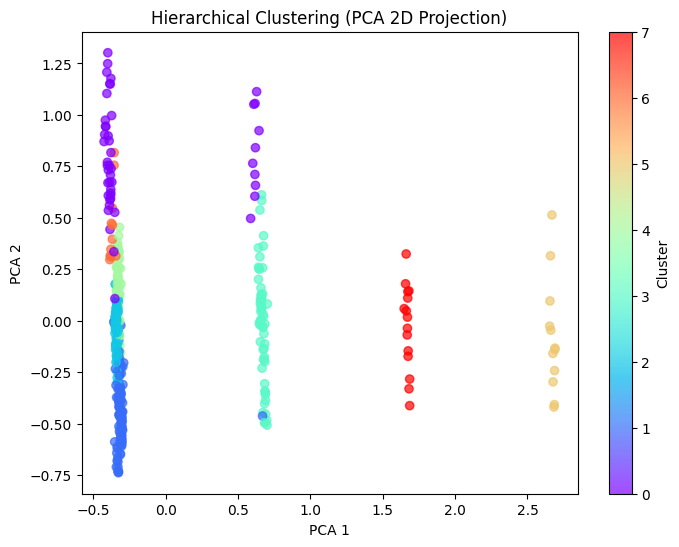

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=sb_dataset['cluster'], cmap='rainbow', alpha=0.7)
plt.title('Hierarchical Clustering (PCA 2D Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [48]:
final_df['Cluster'] = cluster_labels  # assuming you saved cluster labels here
print(final_df.head())


    auctionid      bidder  early_bidding  bidding_ratio  nibble_bidding  \
0  2920322392  cesandjoel       0.406286       0.017405             0.0   
1  2920322392   cnbjbuyer       0.810367       0.017405             0.0   
2  2920322392    deaglekl       0.402023       0.017405             0.0   
3  2920322392   friend_id       0.980733       0.017405             0.0   
4  2920322392     fsuwolf       0.731163       0.017405             0.0   

   last_bidding  starting_price  auction_bids  winning_ratio  buyer_tendency  \
0           0.0             0.0      0.568627            0.0               1   
1           0.0             0.0      0.568627            0.0               1   
2           0.0             0.0      0.568627            0.0               1   
3           0.0             0.0      0.568627            0.0               1   
4           0.0             0.0      0.568627            0.0               1   

   shill_score  Cluster  
0    10.731159        1  
1    11.335164  

In [49]:
print(final_df.columns)


Index(['auctionid', 'bidder', 'early_bidding', 'bidding_ratio',
       'nibble_bidding', 'last_bidding', 'starting_price', 'auction_bids',
       'winning_ratio', 'buyer_tendency', 'shill_score', 'Cluster'],
      dtype='object')


In [51]:
# Select only numeric columns (excluding identifiers)
numeric_cols = final_df.select_dtypes(include='number').columns.difference(['auctionid', 'Cluster'])

# Group by 'Cluster' and calculate mean on numeric columns
cluster_means = final_df.groupby('Cluster')[numeric_cols].mean()

print(cluster_means)


         auction_bids  bidding_ratio  buyer_tendency  early_bidding  \
Cluster                                                               
0            0.299958       0.241559        1.212766       0.914641   
1            0.475309       0.128021        1.009259       0.255414   
2            0.426170       0.088663        1.000000       0.868952   
3            0.321369       0.104112        2.000000       0.688852   
4            0.254176       0.177136        1.000000       0.842566   
5            0.343137       0.073436        4.000000       0.459480   
6            0.351307       0.097763        1.000000       0.966390   
7            0.304575       0.157946        3.000000       0.603863   

         last_bidding  nibble_bidding  shill_score  starting_price  \
Cluster                                                              
0                 1.0        0.058920    32.128048        0.297188   
1                 0.0        0.107550    15.755525        0.072721   
2        

In [52]:
# Global (overall) means for comparison
global_means = final_df.mean(numeric_only=True)
print(global_means)


auctionid         3.014917e+09
early_bidding     6.618256e-01
bidding_ratio     1.333333e-01
nibble_bidding    6.267806e-02
last_bidding      1.160494e-01
starting_price    1.773281e-01
auction_bids      3.772452e-01
winning_ratio     7.925730e-02
buyer_tendency    1.335802e+00
shill_score       2.288023e+01
Cluster           2.306173e+00
dtype: float64


In [55]:
def determine_behavior(cluster_row, global_means):
    behavior = {}
    # Only compare features present in cluster_means (i.e., exclude 'auctionid', 'Cluster', etc.)
    for feature in cluster_row.index:
        if feature in global_means.index:
            if cluster_row[feature] > global_means[feature]:
                behavior[feature] = 'High'
            else:
                behavior[feature] = 'Low'
    return behavior

# Analyze each cluster
cluster_behaviors = {}
for idx, row in cluster_means.iterrows():
    cluster_id = idx  # idx is the cluster number
    cluster_behaviors[cluster_id] = determine_behavior(row, global_means)

# Print behavioral analysis for each cluster
for cluster, behavior in cluster_behaviors.items():
    print(f"\nCluster {cluster} Behavioral Properties:")
    for feat, val in behavior.items():
        print(f"  {feat}: {val}")



Cluster 0 Behavioral Properties:
  auction_bids: Low
  bidding_ratio: High
  buyer_tendency: Low
  early_bidding: High
  last_bidding: High
  nibble_bidding: Low
  shill_score: High
  starting_price: High
  winning_ratio: High

Cluster 1 Behavioral Properties:
  auction_bids: High
  bidding_ratio: Low
  buyer_tendency: Low
  early_bidding: Low
  last_bidding: Low
  nibble_bidding: High
  shill_score: Low
  starting_price: Low
  winning_ratio: Low

Cluster 2 Behavioral Properties:
  auction_bids: High
  bidding_ratio: Low
  buyer_tendency: Low
  early_bidding: High
  last_bidding: Low
  nibble_bidding: Low
  shill_score: Low
  starting_price: Low
  winning_ratio: Low

Cluster 3 Behavioral Properties:
  auction_bids: Low
  bidding_ratio: Low
  buyer_tendency: High
  early_bidding: High
  last_bidding: Low
  nibble_bidding: Low
  shill_score: Low
  starting_price: Low
  winning_ratio: Low

Cluster 4 Behavioral Properties:
  auction_bids: Low
  bidding_ratio: High
  buyer_tendency: Low
  

In [56]:
# Example mapping based on your Table 3 (you can adjust)
cluster_label_map = {
    0: 'Normal',
    1: 'Normal',
    2: 'Suspicious',
    3: 'Normal',
    4: 'Suspicious',
    5: 'Suspicious',
    6: 'Suspicious',
    7: 'Normal'
}

# Apply this mapping to label data
final_df['Label'] = final_df['Cluster'].map(cluster_label_map)
print(final_df[['auctionid', 'bidder', 'Cluster', 'Label']].head())


    auctionid      bidder  Cluster       Label
0  2920322392  cesandjoel        1      Normal
1  2920322392   cnbjbuyer        2  Suspicious
2  2920322392    deaglekl        1      Normal
3  2920322392   friend_id        2  Suspicious
4  2920322392     fsuwolf        2  Suspicious


In [57]:
# Final dataset with labels
print("\nFinal Labelled Dataset Sample:\n", final_df.head())



Final Labelled Dataset Sample:
     auctionid      bidder  early_bidding  bidding_ratio  nibble_bidding  \
0  2920322392  cesandjoel       0.406286       0.017405             0.0   
1  2920322392   cnbjbuyer       0.810367       0.017405             0.0   
2  2920322392    deaglekl       0.402023       0.017405             0.0   
3  2920322392   friend_id       0.980733       0.017405             0.0   
4  2920322392     fsuwolf       0.731163       0.017405             0.0   

   last_bidding  starting_price  auction_bids  winning_ratio  buyer_tendency  \
0           0.0             0.0      0.568627            0.0               1   
1           0.0             0.0      0.568627            0.0               1   
2           0.0             0.0      0.568627            0.0               1   
3           0.0             0.0      0.568627            0.0               1   
4           0.0             0.0      0.568627            0.0               1   

   shill_score  Cluster       Label

In [58]:
# Save to CSV
final_df.to_csv('Labeled_SB_Training_Data.csv', index=False)

print("Final dataset with labels saved successfully as 'Labeled_SB_Training_Data.csv'")


Final dataset with labels saved successfully as 'Labeled_SB_Training_Data.csv'


In [59]:
pip install imbalanced-learn pandas scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.1 MB 1.9 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.1 MB 2.0 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.1 MB 1.9 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 1.9 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.1 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.1 MB 2.0 MB/s eta 0:00:05
   ------------- -------------------------- 3.7/11.1 MB 2.0 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 2.0 MB/s eta 0:00:04
   ---------------- ----------------------- 4.7/11.1 MB 2.0 MB/s eta 0:00:04
   ------------------ --------------------- 5.2/11.1 MB 2.1 MB/s eta 0:00:03
   ----------

  You can safely remove it manually.


In [60]:
# Separate features and labels
X = final_df.drop(['auctionid', 'bidder', 'Label', 'Cluster'], axis=1)  # drop non-feature columns
y = final_df['Label'].map({'Normal': 0, 'Suspicious': 1})  # Encode labels: Normal=0, Suspicious=1


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [65]:
%pip install --upgrade scikit-learn imbalanced-learn

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# 1. Check original distribution
print("Original Class Distribution:", dict(zip(*np.unique(y_train, return_counts=True))))

# 2. Apply SMOTE to increase minority class to desired size
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Increase minority
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", dict(zip(*np.unique(y_smote, return_counts=True))))

# 3. Analyze class counts
unique, counts = np.unique(y_smote, return_counts=True)
class_distribution = dict(zip(unique, counts))
normal_count = class_distribution[0]
suspicious_count = class_distribution[1]

# 4. Now dynamically decide under-sampling target to keep approx 2:1 ratio (Normal:Suspicious)
# To keep 2:1 ratio, Normal = 2 * Suspicious
target_normal = 2 * suspicious_count
if target_normal > normal_count:
    print("Cannot achieve 2:1 ratio because not enough Normal samples, adjusting...")
    target_normal = normal_count  # Use maximum available

# 5. Now create sampling strategy
sampling_strategy = {0: target_normal, 1: suspicious_count}  # Dict format for RandomUnderSampler

# 6. Apply under-sampling
under = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_hybrid, y_hybrid = under.fit_resample(X_smote, y_smote)

print("After Hybrid (SMOTE + UnderSampling):", dict(zip(*np.unique(y_hybrid, return_counts=True))))


  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py)

In [68]:
# Create DataFrame (assuming X_hybrid is numpy array and y_hybrid is label array)
try:
	X_hybrid_df = pd.DataFrame(X_hybrid, columns=X_train.columns)  # Use same feature names
	X_hybrid_df['Label'] = y_hybrid  # Add target label

	# Save to CSV
	X_hybrid_df.to_csv("balanced_dataset.csv", index=False)
	print("Balanced dataset saved as 'balanced_dataset.csv'")
except NameError:
	print("❌ X_hybrid or y_hybrid is not defined. Please run the cell that creates them (the hybrid resampling cell) first.")


❌ X_hybrid or y_hybrid is not defined. Please run the cell that creates them (the hybrid resampling cell) first.


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [71]:
%pip install --upgrade scikit-learn imbalanced-learn

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py)

In [74]:
%pip install --upgrade scikit-learn imbalanced-learn

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name '_deprecate_Xt_in_inverse_transform' from 'sklearn.utils.deprecation' (c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py)

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Parameter grid based on Table 5
param_grid = {
    'C': [1.5, 1.9, 2.3, 2.5, 3.0],
    'gamma': [0.1, 0.9],
    'kernel': ['rbf']
}

# SVM model
svm = SVC()

# Grid Search with 10-fold cross-validation
grid = GridSearchCV(svm, param_grid, scoring='roc_auc', cv=10)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best AUC Score:", grid.best_score_)


Best Parameters: {'C': 2.3, 'gamma': 0.9, 'kernel': 'rbf'}
Best AUC Score: 0.9626602564102564


In [76]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Best model
best_svm = grid.best_estimator_

# Predict
y_pred = best_svm.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        69
           1       0.79      0.87      0.83        53

    accuracy                           0.84       122
   macro avg       0.84      0.85      0.84       122
weighted avg       0.85      0.84      0.84       122

Confusion Matrix:
 [[57 12]
 [ 7 46]]
AUC Score: 0.8470057424118129


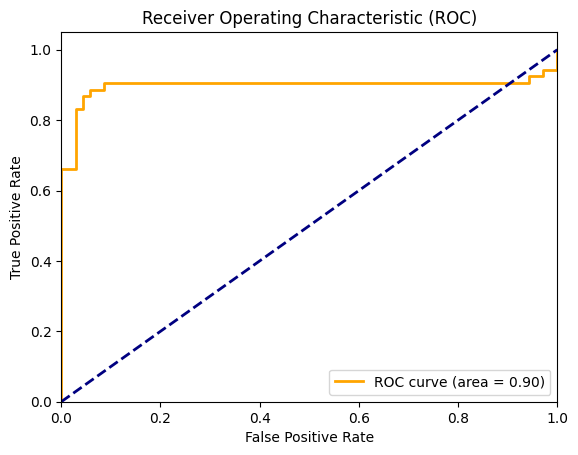

AUC Score: 0.8980038282745422


In [77]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example: Train your model
model = svm.SVC(kernel='linear', probability=True)  # Make sure probability=True is used
model.fit(X_train, y_train)

# Step 1: Get true labels for test set
y_true = y_test  # Replace with your actual test labels

# Step 2: Get prediction probabilities for positive class (Suspicious = 1)
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Step 3: Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Step 4: Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc}")
